![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [291]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import re

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv


In [292]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [293]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [294]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [295]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [296]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [297]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [298]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [299]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [300]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [301]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [302]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [303]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
10455,id_6183,Paris,"['French', 'Bar', 'European']",6184.0,$$ - $$$,155.0,[['At Porte de St Cloud - Spacious - Ok food.....,/Restaurant_Review-g187147-d5522488-Reviews-Le...,d5522488,1,3.5
25987,id_571,Berlin,"['Italian', 'Mediterranean', 'European', 'Vege...",572.0,$$ - $$$,164.0,"[['Charming Place but Watch What You Order', '...",/Restaurant_Review-g187323-d1568708-Reviews-Bo...,d1568708,1,4.0
15664,id_792,Munich,"['Vegetarian Friendly', 'Vegan Options']",800.0,$$ - $$$,43.0,[['Fantastic vegetarian/vegan food and lovely....,/Restaurant_Review-g187309-d1101434-Reviews-Ve...,d1101434,1,4.0
34371,id_3066,London,['American'],3072.0,$$ - $$$,21.0,"[['Great southern American food', 'Amazing Foo...",/Restaurant_Review-g186338-d12406947-Reviews-S...,d12406947,1,5.0
41562,id_2620,Brussels,"['Belgian', 'European']",2621.0,$$ - $$$,13.0,[['Beatiful place but would benefit from bett....,/Restaurant_Review-g188644-d3683254-Reviews-Eu...,d3683254,1,3.0


In [304]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

In [305]:
# Количество отзывов
data['isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')
# заполняем пропуски средним по городу
mean = data.groupby('City')['Number of Reviews'].mean()
data['Number_of_Reviews'] = data[data['isNAN'] > 0].City.apply(
    lambda x: round(mean.loc[x]))
data['Number of Reviews'].fillna(0, inplace=True)
data['Number_of_Reviews'].fillna(0, inplace=True)
data['Number of Reviews'] = data['Number of Reviews'] + data['Number_of_Reviews']
data.drop(['Number_of_Reviews'], axis = 1, inplace = True)

### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [306]:
data.nunique(dropna=False)

Restaurant_id        13094
City                    31
Cuisine Style        10732
Ranking              12975
Price Range              4
Number of Reviews     1573
Reviews              41858
URL_TA               49963
ID_TA                49963
sample                   2
Rating                  10
isNAN                    2
dtype: int64

Для кодирования категориальных признаков есть множество подходов:
* Label Encoding
* One-Hot Encoding
* Target Encoding
* Hashing

Выбор кодирования зависит от признака и выбраной модели.
Не будем сейчас сильно погружаться в эту тематику, давайте посмотрим лучше пример с One-Hot Encoding:
![](https://i.imgur.com/mtimFxh.png)

 ### признак "Price Range"

In [307]:
#посмотрим, как распределены значения ценового диапазона
display(data['Price Range'].unique())
data['Price Range'].value_counts()

array(['$$ - $$$', '$$$$', '$', nan], dtype=object)

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

In [308]:
#посмотрим наиболее часто встречающееся значение
data['Price Range'].mode()

0    $$ - $$$
dtype: object

In [309]:
# пишем функцию для обработки ценового диапазона
def price(dollar):
    if dollar['Price Range'] == '$':
        return 'small'
    if dollar['Price Range'] == '$$ - $$$':
        return 'average'
    if dollar['Price Range'] == '$$$$':
        return 'maximum'
    else:
        return 'average' 

In [310]:
new_price = data.apply(lambda dollar:price(dollar), axis = 1)
data['Price Range'] = new_price

In [311]:
display(data['Price Range'].unique())
data['Price Range'].value_counts()

array(['average', 'maximum', 'small'], dtype=object)

average    40402
small       7816
maximum     1782
Name: Price Range, dtype: int64

### признак "Cuisine Style"

In [312]:
# Cuisine Style: Кухня
data.loc[0, 'Cuisine Style']

"['Bar', 'Pub']"

In [313]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          50000 non-null object
Number of Reviews    50000 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
isNAN                50000 non-null uint8
dtypes: float64(3), int64(1), object(7), uint8(1)
memory usage: 4.2+ MB


In [314]:
# заполним пропуски в кухнях на значение Unknown
data['Cuisine Style'].fillna('Unknown', inplace=True)

In [315]:
# сделаем список кухонь
data['Cuisine_list'] = data['Cuisine Style'].str[2:-2].str.split("', '")

In [316]:
# подсчитаем количество кухонь в каждом ресторане
data['Number_of_cuisine'] = data['Cuisine_list'].apply(len)

In [317]:
# среднее количество кухонь в одном ресторане
data['Number_of_cuisine'].mean()

2.62532

In [318]:
# заполняем пропуски кухонь средним значением
data['Number_of_cuisine'] = data['Number_of_cuisine'].fillna(2.6)

In [319]:
# подсчитаем отношение рейтинга к количеству кухонь
data['Ranking_ratio'] = round(data['Number_of_cuisine'] / data['Ranking'], 5)

In [320]:
# создадим список уникальных кухонь
all_cuis = list(pd.Series(data['Cuisine_list'].sum()).unique())

In [321]:
# посчитаем популярность кухонь
summary = pd.Series(data['Cuisine_list'].sum()).value_counts()
summary_columns = summary.sum()

popularity = {}
for cuisine in all_cuis:
    popularity[cuisine] = round(summary[cuisine] / summary_columns, 5)

In [322]:
# добавляем новую колонку
def popular(x):
    count = 0
    for cuisine in x:
        count = count + popularity[cuisine]
    return count

data['Cuisine_popularity'] = data.Cuisine_list.apply(lambda x: popular(x))
data['Cuisine_popularity']

0        0.05449
1        0.28872
2        0.10681
3        0.35820
4        0.37251
          ...   
49995    0.24624
49996    0.27644
49997    0.02522
49998    0.22390
49999    0.02633
Name: Cuisine_popularity, Length: 50000, dtype: float64

In [323]:
# создадим столбец, показывающий соотношение между популярностью и количеством отзывов
# чем популярнее кухня, тем большее количество отзывов у нее будет
data['popularity_ratio'] = round(data['Number of Reviews'] / data['Cuisine_popularity'], 5)

In [324]:
# создадим столбец с уникальными кухнями
a = data.groupby(['Restaurant_id'])['Cuisine Style'].nunique()
data['cuisine_unique'] = data.Restaurant_id.map(a)

### признак "Reviews"

In [325]:
# Заменим пустые значения на аналогичные
data['Reviews'].fillna('[[], []]', inplace=True)

In [326]:
# напишем функцию, которая выводит "1", если присутствует положительный отзыв, и "0", если такого отзыва нет
def find_good_words(s):
    good_words = ['good', 'yummy', 'fine', 'great', 'tasty',
                  'satisfaction', 'amazing', 'nice', 'best',
                  'friendly', 'pleasant', 'exellent', 'loved',
                  'love', 'lovely', 'welcoming', 'wonderful',
                  'perfect', 'delicious', 'favourite', 'sweet',
                  'yum', 'adequate', 'happy', 'beautiful', 'liked', 'like']
    count = 0
    for item in good_words:
        if item in s:
            count += 1
    if count >= 1:
        result = 1
    else:
        result = 0
    return(result)

In [327]:
data['Number_review'] = np.nan
data['Number_review'] = data.Reviews.str.lower().apply(lambda s: find_good_words(s))

In [328]:
# заменяем пустые значения средним
def null_replace(x):
    for i in data.columns:
        if data[i].dtype == float:
            data[i] = data[i].fillna(data[i].mean())
    return x

In [329]:
data = data.apply(null_replace)

In [330]:
# поработаем с датами в отзывах, подсчитаем дельту
pattern = re.compile("\d+\/\d+\/\d+")
data['Date_of_Reviews'] = data['Reviews'].apply(pattern.findall)
data['delta_dates'] = data.Date_of_Reviews

In [331]:
# создаем список с датами, далее парсим его
dates = data.Date_of_Reviews
data['delta_dates'] = [pd.to_datetime(d) for d in data['delta_dates']]
parsed_dates = [pd.to_datetime(d) for d in dates]

# создаем столбец для дельты
data['dates'] = np.nan

In [332]:
# создаем список с дельтой дней между отзывами
timedelta = []
for i in parsed_dates:
    d1 = i.max()
    d2 = i.min()
    d = d1-d2
    timedelta.append(d)

data['dates'] = timedelta

In [333]:
# приводим дельту к числу
data['dates'] = pd.to_numeric(data['dates'].dt.days, downcast='integer')

In [334]:
data.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,...,Cuisine_list,Number_of_cuisine,Ranking_ratio,Cuisine_popularity,popularity_ratio,cuisine_unique,Number_review,Date_of_Reviews,delta_dates,dates
0,id_0,Paris,"['Bar', 'Pub']",12963.0,average,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,...,"[Bar, Pub]",2,0.00015,0.05449,73.40796,16,0,[],"DatetimeIndex([], dtype='datetime64[ns]', freq...",NaN
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,average,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,...,"[European, Scandinavian, Gluten Free Options, ...",5,0.04717,0.28872,335.96564,10,1,"[12/05/2017, 10/29/2017]","DatetimeIndex(['2017-12-05', '2017-10-29'], dt...",37.0
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,average,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,...,[Vegetarian Friendly],1,0.00123,0.10681,262.14774,15,0,"[12/28/2017, 12/06/2017]","DatetimeIndex(['2017-12-28', '2017-12-06'], dt...",22.0
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,maximum,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,...,"[Italian, Mediterranean, European, Vegetarian ...",5,0.00300,0.35820,563.93076,9,1,"[12/06/2017, 11/22/2017]","DatetimeIndex(['2017-12-06', '2017-11-22'], dt...",14.0
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,maximum,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,...,"[Italian, Mediterranean, European, Seafood, Ve...",6,0.16216,0.37251,434.88765,14,1,"[02/08/2018, 01/24/2018]","DatetimeIndex(['2018-02-08', '2018-01-24'], dt...",15.0


In [335]:
# вычислим среднее значение количества дней между отзывами
data.dates.mean()

123.21833070715752

In [336]:
# заменим пропуски на среднее значение
def null_replace(x):
    for i in data.columns:
        if data[i].dtype == float:
            # замена пустых ячеек на медиану для типа переменной float
            data[i] = data[i].fillna(123.2)
    return x

In [337]:
data = data.apply(null_replace)

### новые признаки

In [338]:
# создаем столбец с населением в городах
def citty(x):
    if x == 'Paris':
        return 2161000
    if x == 'Stockholm':
        return 975551
    if x == 'London':
        return 8982000
    if x == 'Berlin':
        return 3645000
    if x == 'Munich':
        return 1472000
    if x == 'Oporto':
        return 214349
    if x == 'Milan':
        return 1378689
    if x == 'Bratislava':
        return 424428
    if x == 'Vienna':
        return 1897000
    if x == 'Rome':
        return 2873000
    if x == 'Barcelona':
        return 1664182
    if x == 'Madrid':
        return 3223000
    if x == 'Dublin':
        return 544107
    if x == 'Brussels':
        return 174383
    if x == 'Zurich':
        return 402762
    if x == 'Warsaw':
        return 1765000
    if x == 'Budapest':
        return 1756000
    if x == 'Copenhagen':
        return 602481
    if x == 'Amsterdam':
        return 821752
    if x == 'Lyon':
        return 513275
    if x == 'Hamburg':
        return 1841000
    if x == 'Lisbon':
        return 504718
    if x == 'Prague':
        return 1309000
    if x == 'Oslo':
        return 634293
    if x == 'Helsinki':
        return 631695
    if x == 'Edinburgh':
        return 482005
    if x == 'Geneva':
        return 198979
    if x == 'Ljubljana':
        return 279631
    if x == 'Athens':
        return 664046
    if x == 'Luxembourg':
        return 613894
    if x == 'Krakow':
        return 766683

In [339]:
data['people'] = np.nan
new = data.City.apply(lambda x: citty(x))
data['people'] = new

In [340]:
# создаем столбец с информацией, является ли город столицей
def capit(x):
    if x == 'Paris':
        return 'yes'
    if x == 'Stockholm':
        return 'yes'
    if x == 'London':
        return 'yes'
    if x == 'Berlin':
        return 'yes'
    if x == 'Munich':
        return 'no'
    if x == 'Oporto':
        return 'no'
    if x == 'Milan':
        return 'no'
    if x == 'Bratislava':
        return 'yes'
    if x == 'Vienna':
        return 'yes'
    if x == 'Rome':
        return 'yes'
    if x == 'Barcelona':
        return 'no'
    if x == 'Madrid':
        return 'yes'
    if x == 'Dublin':
        return 'yes'
    if x == 'Brussels':
        return 'yes'
    if x == 'Zurich':
        return 'no'
    if x == 'Warsaw':
        return 'yes'
    if x == 'Budapest':
        return 'yes'
    if x == 'Copenhagen':
        return 'yes'
    if x == 'Amsterdam':
        return 'yes'
    if x == 'Lyon':
        return 'no'
    if x == 'Hamburg':
        return 'yes'
    if x == 'Lisbon':
        return 'yes'
    if x == 'Prague':
        return 'yes'
    if x == 'Oslo':
        return 'yes'
    if x == 'Helsinki':
        return 'yes'
    if x == 'Edinburgh':
        return 'yes'
    if x == 'Geneva':
        return 'no'
    if x == 'Ljubljana':
        return 'yes'
    if x == 'Athens':
        return 'yes'
    if x == 'Luxembourg':
        return 'yes'
    if x == 'Krakow':
        return 'no'

In [341]:
data['capital'] = np.nan
new2 = data.City.apply(lambda x: capit(x))
data['capital'] = new2

In [342]:
# создаем столбец, показывающий количество (млн) туристов в год
def tour(x):
    if x == 'Paris':
        return 38
    if x == 'Stockholm':
        return 11
    if x == 'London':
        return 30 
    if x == 'Berlin':
        return 135 
    if x == 'Munich':
        return 70
    if x == 'Oporto':
        return 1.6
    if x == 'Milan':
        return 8.81
    if x == 'Bratislava':
        return 5.4
    if x == 'Vienna':
        return 17.6
    if x == 'Rome':
        return 29
    if x == 'Barcelona':
        return 12 
    if x == 'Madrid':
        return 6
    if x == 'Dublin':
        return 10
    if x == 'Brussels':
        return 9.4
    if x == 'Zurich':
        return 5.7
    if x == 'Warsaw':
        return 9.6
    if x == 'Budapest':
        return 30
    if x == 'Copenhagen':
        return 10
    if x == 'Amsterdam':
        return 46
    if x == 'Lyon':
        return 6
    if x == 'Hamburg':
        return 6.6
    if x == 'Lisbon':
        return 27.9
    if x == 'Prague':
        return 8
    if x == 'Oslo':
        return 4.8
    if x == 'Helsinki':
        return 1.2
    if x == 'Edinburgh':
        return 3.7
    if x == 'Geneva':
        return 3.2
    if x == 'Ljubljana':
        return 28
    if x == 'Athens':
        return 34.2
    if x == 'Luxembourg':
        return 1
    if x == 'Krakow':
        return 14

In [343]:
data['tourism'] = np.nan
new3 = data.City.apply(lambda x: tour(x))
data['tourism'] = new3

In [344]:
# создаем столбец, указывающий на страну
def countrry(x):
    if x == 'Paris':
        return 'France'
    if x == 'Stockholm':
        return 'Sweden'
    if x == 'London':
        return 'England'
    if x == 'Berlin':
        return 'Germany'
    if x == 'Munich':
        return 'Germany'
    if x == 'Oporto':
        return 'Portugal'
    if x == 'Milan':
        return 'Italy'
    if x == 'Bratislava':
        return 'Slovakia'
    if x == 'Vienna':
        return 'Austria'
    if x == 'Rome':
        return 'Italy'
    if x == 'Barcelona':
        return 'Spain'
    if x == 'Madrid':
        return 'Spain'
    if x == 'Dublin':
        return 'Ireland'
    if x == 'Brussels':
        return 'Belgium'
    if x == 'Zurich':
        return 'Switzerland'
    if x == 'Warsaw':
        return 'Poland'
    if x == 'Budapest':
        return 'Hungary'
    if x == 'Copenhagen':
        return 'Denmark'
    if x == 'Amsterdam':
        return 'Netherlands'
    if x == 'Lyon':
        return 'France'
    if x == 'Hamburg':
        return 'Germany'
    if x == 'Lisbon':
        return 'Portugal'
    if x == 'Prague':
        return 'Czech Republic'
    if x == 'Oslo':
        return 'Norway'
    if x == 'Helsinki':
        return 'Finland'
    if x == 'Edinburgh':
        return 'Scotland'
    if x == 'Geneva':
        return 'Switzerland'
    if x == 'Ljubljana':
        return 'Slovenia'
    if x == 'Athens':
        return 'Greece'
    if x == 'Luxembourg':
        return 'Luxembourg'
    if x == 'Krakow':
        return 'Poland'

In [345]:
data['country'] = np.nan
new4 = data.City.apply(lambda x: countrry(x))
data['country'] = new4

In [346]:
# создаем столбец с ежемесячным заработком в стране
def money(x):
    if x == 'Spain':
        return 1800
    if x == 'France':
        return 1621
    if x == 'England':
        return 1453.2
    if x == 'Italy':
        return 1800
    if x == 'Germany':
        return 1557
    if x == 'Portugal':
        return 700
    if x == 'Czech Republic':
        return 518.9
    if x == 'Poland':
        return 523
    if x == 'Austria':
        return 1500
    if x == 'Netherlands':
        return 1615.8
    if x == 'Belgium':
        return 1593.7
    if x == 'Switzerland':
        return 1491.97
    if x == 'Sweden':
        return 2000
    if x == 'Hungary':
        return 464.2
    if x == 'Ireland':
        return 1656.2
    if x == 'Denmark':
        return 2476
    if x == 'Greece':
        return 540
    if x == 'Scotland':
        return 2026.6
    if x == 'Norway':
        return 558.8
    if x == 'Finland':
        return 1211
    if x == 'Slovakia':
        return 520
    if x == 'Luxembourg':
        return 2071.1
    if x == 'Slovenia':
        return 886.6

In [347]:
data['money'] = np.nan
new5 = data.country.apply(lambda x: money(x))
data['money'] = new5

In [348]:
# создадим столбец, показывающий расстояние от города до центра Евросоюза (км)
# чем ближе город к центру, тем проще в него попасть
def centerr(x):
    if x == 'Paris':
        return 557.9
    if x == 'Stockholm':
        return 1176.1
    if x == 'London':
        return 730.12
    if x == 'Berlin':
        return 383.55
    if x == 'Munich':
        return 225.63
    if x == 'Oporto':
        return 1729.81
    if x == 'Milan':
        return 489.82
    if x == 'Bratislava':
        return 557.94
    if x == 'Vienna':
        return 505.18
    if x == 'Rome':
        return 906.19
    if x == 'Barcelona':
        return 1115.27
    if x == 'Madrid':
        return 1491.97
    if x == 'Dublin':
        return 1179.59
    if x == 'Brussels':
        return 407.6
    if x == 'Zurich':
        return 292.69
    if x == 'Warsaw':
        return 819.26
    if x == 'Budapest':
        return 719.13
    if x == 'Copenhagen':
        return 673.67
    if x == 'Amsterdam':
        return 448.52
    if x == 'Lyon':
        return 591.51
    if x == 'Hamburg':
        return 412.02
    if x == 'Lisbon':
        return 1947.79
    if x == 'Prague':
        return 324.01
    if x == 'Oslo':
        return 1120.74
    if x == 'Helsinki':
        return 1488.45
    if x == 'Edinburgh':
        return 1107.13
    if x == 'Geneva':
        return 492.13
    if x == 'Ljubljana':
        return 543.42
    if x == 'Athens':
        return 1717.43
    if x == 'Luxembourg':
        return 270.87
    if x == 'Krakow':
        return 721.85

In [349]:
data['center'] = np.nan
new5 = data.City.apply(lambda x: centerr(x))
data['center'] = new5

 ### новые признаки, созданные на основе предыдущих

In [350]:
# подсчитаем количество ранжируемых ресторанов в каждом городе
rest_count = data.groupby(['City'])['Ranking'].max()
data['restaurant_city'] = data.City.map(rest_count)
data['restaurant_city']

0        13986.0
1         1141.0
2         1766.0
3        16444.0
4          889.0
          ...   
49995     6275.0
49996    13986.0
49997     2464.0
49998     2154.0
49999     6275.0
Name: restaurant_city, Length: 50000, dtype: float64

In [351]:
# подсчитаем количество ранжируемых ресторанов, приходящихся на население
data['people_restaurant'] = round((data['restaurant_city'] / data['people']), 5)
data['people_restaurant']

0        0.00647
1        0.00181
2        0.00366
3        0.00183
4        0.00209
          ...   
49995    0.00455
49996    0.00647
49997    0.00253
49998    0.00122
49999    0.00455
Name: people_restaurant, Length: 50000, dtype: float64

In [352]:
#посмотрим, как зависит Ranking от количества жителей в городе
data['Ranking_people'] = round(data['Ranking']/data['people'], 5)
data['Ranking_people']

0        0.00600
1        0.00017
2        0.00168
3        0.00019
4        0.00009
          ...   
49995    0.00036
49996    0.00293
49997    0.00169
49998    0.00036
49999    0.00350
Name: Ranking_people, Length: 50000, dtype: float64

In [353]:
# подсчитаем пропорцию между количеством отзывов и количеством жителей
#(сколько отзывов приходится на одного жителя города)
data['Reviews_city'] = round((data['people']/data['Number of Reviews']), 5)
data['Reviews_city']

0        540250.00000
1          6512.31959
2         17214.46429
3         44465.34653
4          2619.92593
             ...     
49995     17451.75949
49996      3987.08487
49997    243887.75000
49998     25214.28571
49999      5302.65000
Name: Reviews_city, Length: 50000, dtype: float64

In [354]:
# посмотрим на нормализованный ранг ресторана в городе:
data['Normal_ranking'] = round((data.Ranking / data.restaurant_city),2)
data['Normal_ranking']

0        0.93
1        0.09
2        0.46
3        0.10
4        0.04
         ... 
49995    0.08
49996    0.45
49997    0.67
49998    0.30
49999    0.77
Name: Normal_ranking, Length: 50000, dtype: float64

In [355]:
# подсчитываем среднее количество отзывов на один ресторан в городе: 

Reviws_sum = data.groupby(['City'])['Number of Reviews'].sum()
Reviws_count = data.groupby(['City'])['Number of Reviews'].count()

reviws_dict = {}
for city in list(data.City.unique()):
    reviws_dict[city] = round(Reviws_sum[city]/Reviws_count[city])

reviws_dict

{'Paris': 117.0,
 'Helsinki': 66.0,
 'Edinburgh': 238.0,
 'London': 138.0,
 'Bratislava': 52.0,
 'Lisbon': 128.0,
 'Budapest': 159.0,
 'Stockholm': 75.0,
 'Rome': 290.0,
 'Milan': 168.0,
 'Munich': 78.0,
 'Hamburg': 45.0,
 'Prague': 124.0,
 'Vienna': 81.0,
 'Dublin': 154.0,
 'Barcelona': 136.0,
 'Brussels': 93.0,
 'Madrid': 100.0,
 'Oslo': 100.0,
 'Amsterdam': 149.0,
 'Berlin': 64.0,
 'Lyon': 87.0,
 'Athens': 94.0,
 'Warsaw': 67.0,
 'Oporto': 134.0,
 'Krakow': 131.0,
 'Copenhagen': 95.0,
 'Luxembourg': 83.0,
 'Zurich': 73.0,
 'Geneva': 62.0,
 'Ljubljana': 88.0}

In [356]:
# выводим это число в отдельный столбец
data['review_mean'] = data.City.map(reviws_dict)
data['review_mean']

0        117.0
1         66.0
2        238.0
3        138.0
4         52.0
         ...  
49995    168.0
49996    117.0
49997     75.0
49998     67.0
49999    168.0
Name: review_mean, Length: 50000, dtype: float64

In [357]:
# создаем таблицу с количеством ресторанов с одинаковым id: 
number_id = data.groupby(['Restaurant_id'])['Ranking'].count()
number_id

Restaurant_id
id_0       16
id_1       10
id_10      15
id_100     13
id_1000    12
           ..
id_9995     3
id_9996     1
id_9997     1
id_9998     1
id_9999     1
Name: Ranking, Length: 13094, dtype: int64

In [358]:
# добавляем колонку c общим количеством ресторанов c одинаковым рeйтингом:
data['Number_id'] = data.apply(lambda row: number_id[row.Restaurant_id],axis = 1)
data['Number_id']

0        16
1        10
2        15
3         9
4        14
         ..
49995    15
49996     3
49997    11
49998     9
49999     5
Name: Number_id, Length: 50000, dtype: int64

In [359]:
# проверяем, есть ли null-значения
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 35 columns):
Restaurant_id         50000 non-null object
City                  50000 non-null object
Cuisine Style         50000 non-null object
Ranking               50000 non-null float64
Price Range           50000 non-null object
Number of Reviews     50000 non-null float64
Reviews               50000 non-null object
URL_TA                50000 non-null object
ID_TA                 50000 non-null object
sample                50000 non-null int64
Rating                50000 non-null float64
isNAN                 50000 non-null uint8
Cuisine_list          50000 non-null object
Number_of_cuisine     50000 non-null int64
Ranking_ratio         50000 non-null float64
Cuisine_popularity    50000 non-null float64
popularity_ratio      50000 non-null float64
cuisine_unique        50000 non-null int64
Number_review         50000 non-null int64
Date_of_Reviews       50000 non-null object
delta_date

In [360]:
# используем dummies для подходящих столбцов
dummies1 = pd.get_dummies(data['Price Range'])
dummies2 = pd.get_dummies(data['City'])
dummies3 = pd.get_dummies(data['isNAN'])
data = pd.concat([data, dummies1, dummies2, dummies3], axis=1)

In [361]:
data

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,...,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich,0,1
0,id_0,Paris,"['Bar', 'Pub']",12963.0,average,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,...,0,1,0,0,0,0,0,0,1,0
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,average,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,...,0,0,0,0,0,0,0,0,1,0
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,average,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,...,0,0,0,0,0,0,0,0,1,0
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,maximum,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,...,0,0,0,0,0,0,0,0,1,0
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,maximum,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,average,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,...,0,0,0,0,0,0,0,0,1,0
49996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,average,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,...,0,1,0,0,0,0,0,0,1,0
49997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,average,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,...,0,0,0,0,1,0,0,0,1,0
49998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,average,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,...,0,0,0,0,0,0,1,0,1,0


> Для некоторых алгоритмов МЛ даже для не категориальных признаков можно применить One-Hot Encoding, и это может улучшить качество модели. Пробуйте разные подходы к кодированию признака - никто не знает заранее, что может взлететь.

# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение признака

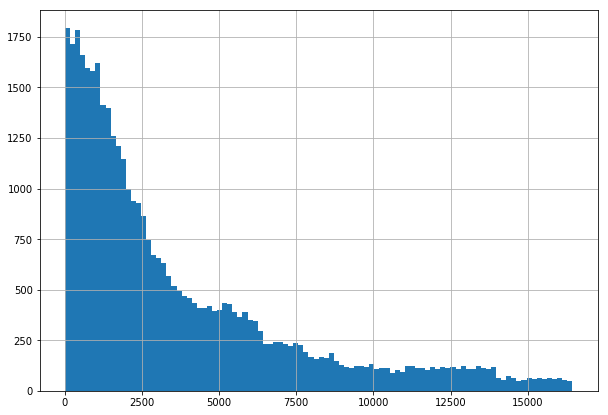

In [362]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

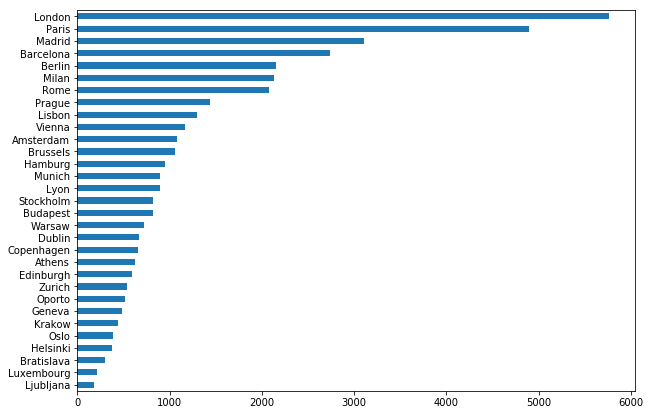

In [363]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

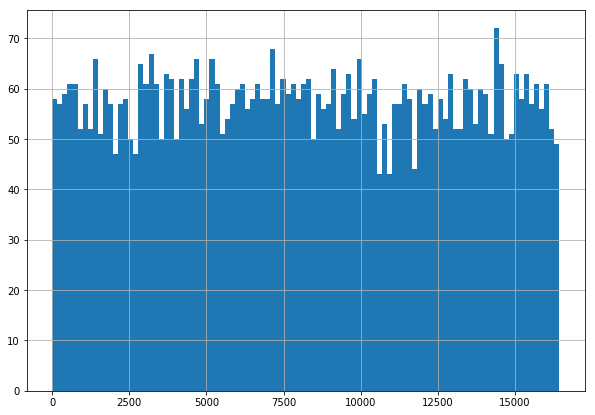

In [364]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

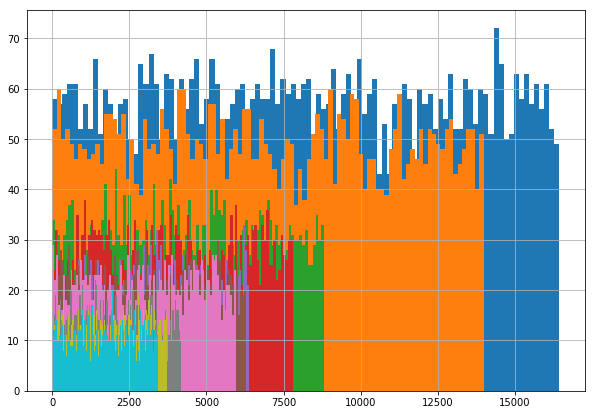

In [365]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

>Подумайте как из этого можно сделать признак для вашей модели. Я покажу вам пример, как визуализация помогает находить взаимосвязи. А далее действуйте без подсказок =) 


### Посмотрим распределение целевой переменной

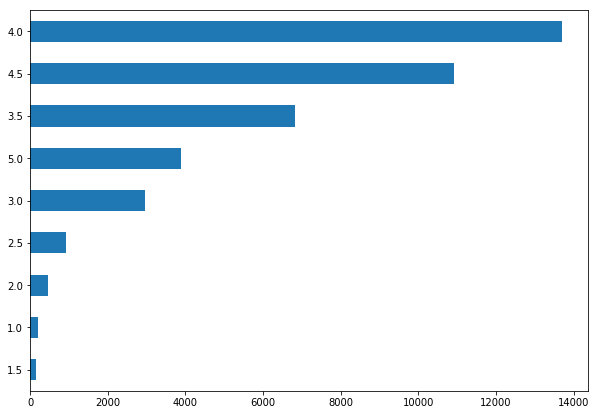

In [366]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

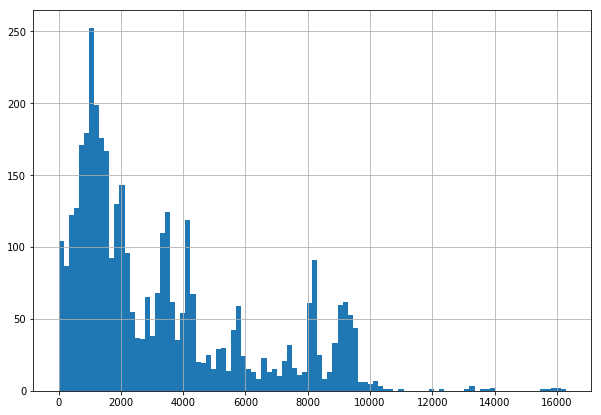

In [367]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

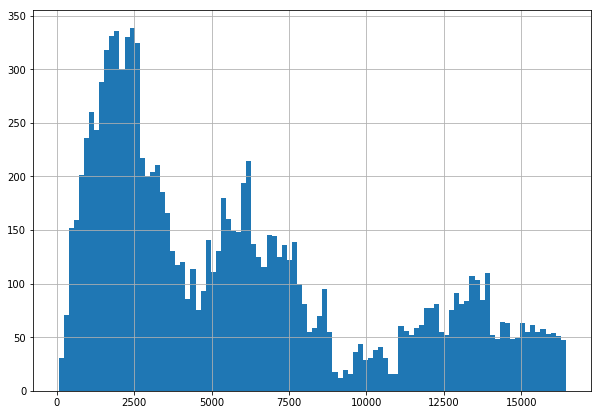

In [368]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

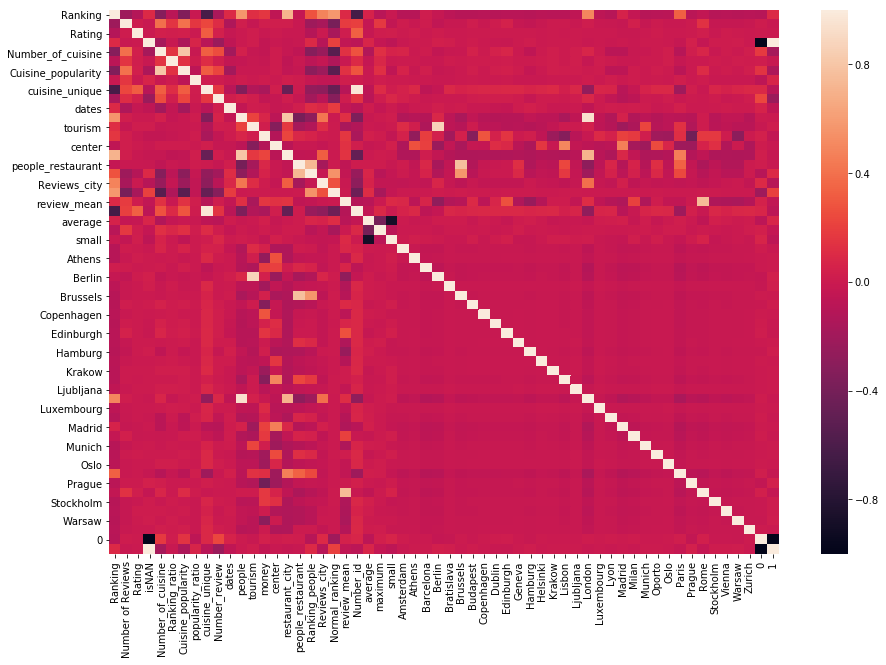

In [369]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

Вообще благодаря визуализации в этом датасете можно узнать много интересных фактов, например:
* где больше Пицерий в Мадриде или Лондоне?
* в каком городе кухня ресторанов более разнообразна?

придумайте свои вопрос и найдите на него ответ в данных)

# Data Preprocessing

In [370]:
df_preproc = data.copy()
df_preproc = df_preproc.drop(['Restaurant_id', 'City', 'Price Range', 'Cuisine Style', 'Cuisine_list', 'Reviews', 'URL_TA', 'Ranking', 'ID_TA', 'Date_of_Reviews', 'delta_dates', 'capital','country', 'isNAN', 'Number_of_cuisine'], axis=1)

# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [371]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 56 columns):
Number of Reviews     50000 non-null float64
sample                50000 non-null int64
Rating                50000 non-null float64
Ranking_ratio         50000 non-null float64
Cuisine_popularity    50000 non-null float64
popularity_ratio      50000 non-null float64
cuisine_unique        50000 non-null int64
Number_review         50000 non-null int64
dates                 50000 non-null float64
people                50000 non-null int64
tourism               50000 non-null float64
money                 50000 non-null float64
center                50000 non-null float64
restaurant_city       50000 non-null float64
people_restaurant     50000 non-null float64
Ranking_people        50000 non-null float64
Reviews_city          50000 non-null float64
Normal_ranking        50000 non-null float64
review_mean           50000 non-null float64
Number_id             50000 non-null int64
a

In [372]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [373]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 55), (40000, 55), (40000, 54), (32000, 54), (8000, 54))

# Model 
Сам ML

In [374]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [375]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [376]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [377]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.2033924375


In [378]:
# Функция для округления результатов предсказаний
def predict_round(y_pred):
    return [(round(y/0.5)*0.5) for y in y_pred]

In [379]:
y_pred = predict_round(y_pred) 

In [380]:
# дублируем расчеты с округлением предсказания
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.171375


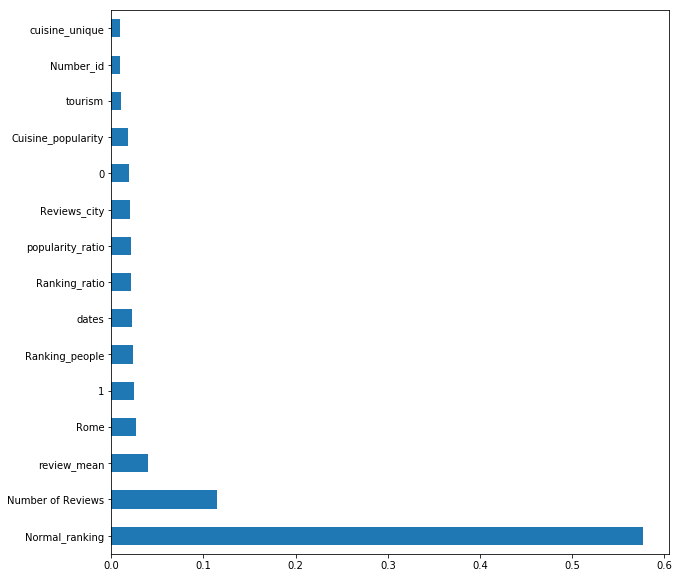

In [381]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [382]:
test_data.sample(10)

,Number of Reviews,Rating,Ranking_ratio,Cuisine_popularity,popularity_ratio,cuisine_unique,Number_review,dates,people,tourism,...,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich,0,1
5660,2.0,0.0,0.00183,0.08687,23.02291,3,1,0.0,198979,3.20,...,0,0,0,0,0,0,0,0,1,0
5455,2.0,0.0,0.00014,0.08829,22.65262,5,0,123.2,3223000,6.00,...,0,0,0,0,0,0,0,0,1,0
7709,182.0,0.0,0.15789,0.20987,867.20351,4,1,3.0,424428,5.40,...,0,0,0,0,0,0,0,0,1,0
5821,2.0,0.0,0.00009,0.00474,421.94093,1,0,123.2,2161000,38.00,...,0,1,0,0,0,0,0,0,1,0
4226,103.0,0.0,0.00063,0.08590,1199.06868,4,0,123.2,3223000,6.00,...,0,0,0,0,0,0,0,0,1,0
9803,113.0,0.0,0.00672,0.26396,428.09517,2,1,35.0,482005,3.70,...,0,0,0,0,0,0,0,0,1,0
2396,708.0,0.0,0.00403,0.35969,1968.36164,6,1,80.0,1378689,8.81,...,0,0,0,0,0,0,0,0,1,0
6642,5.0,0.0,0.00218,0.03988,125.37613,3,1,31.0,1309000,8.00,...,0,0,1,0,0,0,0,0,1,0
4449,208.0,0.0,0.00745,0.18617,1117.25842,4,1,19.0,482005,3.70,...,0,0,0,0,0,0,0,0,1,0
6291,3.0,0.0,0.00012,0.08829,33.97893,3,1,130.0,8982000,30.00,...,0,0,0,0,0,0,0,0,1,0


In [383]:
test_data = test_data.drop(['Rating'], axis=1)

In [384]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [385]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [386]:
predict_submission

array([3.285, 4.26 , 4.51 , ..., 3.055, 4.48 , 4.275])

In [387]:
predict_submission = predict_round(predict_submission)

In [388]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.5
1,id_1,4.5
2,id_2,4.5
3,id_3,4.5
4,id_4,4.5
5,id_5,4.5
6,id_6,2.0
7,id_7,3.5
8,id_8,4.0
9,id_9,4.5


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
